<a href="https://colab.research.google.com/github/VICTORIA-OKESIPE/Personal_Projects/blob/main/Nigeria_Loan_Default_Pred/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KaggleX Final Showcase Project**

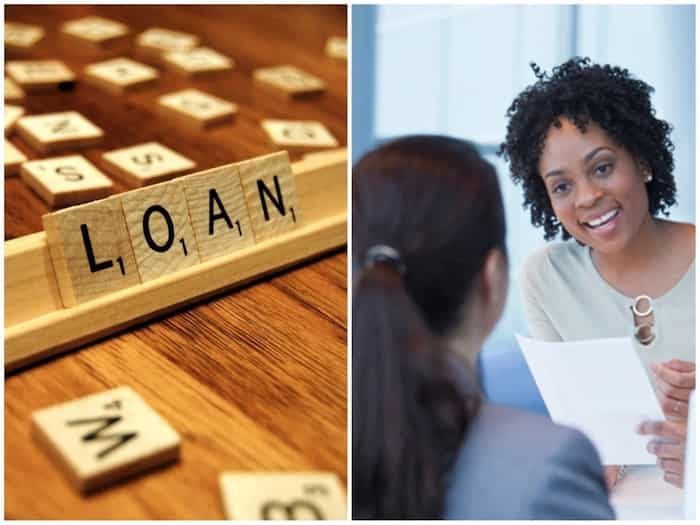

# **PROJECT OUTLINE**
- Business Understanding & Problem Framework


- Exploratory Data Analysis
  * Understanding the Data
  * Relationship Analysis between the variables
  * Cleaning the Data


- Feature Engineering & Modelling
  * Model Training
  * Model Evaluation
  * Shortlisting Promising Models
  * Predictions


- Findings & Recommendations



# **UNDERSTANDING THE PROBLEM**

# **The Problem**

A local digital lending company named SuperLender is dedicated to using credit risk models to offer profitable and impactful loan alternatives. Their assessment approach is based on two key factors that predict loan default: 
(a) the customer's willingness; and 
(b) ability to pay. 



However, since not all customers repay their loans, the company is ready to invest in experienced data scientists to develop robust models for predicting the odds of repayment. 



To make informed decisions about loan approvals, credit grantors need to evaluate these two key factors (the customer's willingness; and the ability to pay) at the point of each application. This is important to determine repayment likelihood and whether an applicant is eligible for a loan, and if so, what the specific terms of the offer will be (like the loan size, price, and tenure).



There are two categories of risk models: (a) new business risk model; and (b) repeat or behavior risk. The former assesses the risk associated with the first loan application, while the latter takes into account the customer's repayment history if they are applying for a repeat loan. Incorporating the customer's prior loan performance can enhance the accuracy of the repeat risk model.



This for me is a great opportunity to use my skills to help solve this challenging problem for SuperLender, a company that values data-driven decision-making.

# **The Objective**

Predict if a loan was good (given) or bad (not given), that is, predict binary outcomes variable, where good is 1 and bad is 0.

# **The Datasets**

There are 3 different datasets: Demographic Data, Performance Data, and Previous Loans Data.

In [1]:
# Importing Necessary Libraries

import pandas as pd     # useful for data manipulation
import numpy as np
import seaborn as sns   # useful for data visualisation
import matplotlib.pyplot as plt  # useful for data visualisation
import plotly.express as px  # useful for high-level data visualisation

In [2]:
# Installing plotly package 

# !pip install plotly

In [3]:
# Importing Datasets

meta_demo = pd.read_table("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/demographic_metadata.txt", sep=",")#, index_col=0)
meta_perf = pd.read_table("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/performance_metadata.txt", sep=",")
meta_prev_loans = pd.read_table("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/previous_loans_metadata.txt", sep=",")

In [4]:
meta_demo

,DemographicData,Description
0,customerid,Encoded primary key used to merge to other data
1,birthdate,Date of birth of the customer
2,bank_account_type,Type of primary bank account
3,longitude_gps,Longitude gps
4,latitude_gps,Latitude gps
5,bank_name_clients,Name of the bank
6,bank_branch_clients,Location of the branch - not compulsory - so ...
7,employment_status_clients,type of employment that customer has
8,level_of_education_clients,highest level of education


In [5]:
meta_perf

,PerformanceData,Description
0,customerid,Encoded primary key used to merge to other data
1,systemloanid,The id associated with the particular loan. Th...
2,loannumber,The number of the loan that you have to predict
3,approveddate,Date that loan was approved
4,creationdate,Date that loan application was created
5,loanamount,Loan value taken
6,totaldue,Total repayment required to settle the loan -...
7,termdays,Term of loan
8,referredby,customerId of the customer that referred this...


In [6]:
meta_prev_loans

,PreviousLoansData,Description
0,customerid,Encoded primary key used to merge to other data
1,systemloanid,The id associated with the particular loan. Th...
2,loannumber,The number of the loan that you have to predict
3,approveddate,Date that loan was approved
4,creationdate,Date that loan application was created
5,loanamount,Date that loan application was created
6,totaldue,Total repayment required to settle the loan - ...
7,termdays,Term of loan
8,closeddate,Date that the loan was settled
9,referredby,customerId of the customer that referred this ...


# **EXPLORATORY DATA ANALYSIS**

## **Understanding the Data**

In [7]:
# Importing Datasets

demo = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/traindemographics.csv")#, index_col=0)
perf = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainperf.csv")#, sep=",")
prev_loans = pd.read_csv("https://raw.githubusercontent.com/VICTORIA-OKESIPE/Personal_Projects/main/Nigeria_Loan_Default_Pred/trainprevloans.csv")#, sep=",")

In [8]:
# Copying dataset to another dataframe to avoid making changes to the original datasets
cust_demo = demo.copy()
cust_perf = perf.copy()
cust_prev_loans = prev_loans.copy()

In [9]:
# Feeling the Datasets

cust_demo.head()      # checking the first five rows of the demographic data

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [10]:
cust_demo.tail()      # checking the last five rows of the data set

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary
4345,8a85896653e2e18b0153e69c1b90265c,1975-06-05 00:00:00.000000,Savings,6.661014,7.472700,UBA,NaN,Permanent,NaN


In [11]:
cust_perf.head()      # checking the first five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [12]:
cust_perf.tail()      # checking the last five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad


In [13]:
cust_prev_loans.head()      # checking the first five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [14]:
cust_prev_loans.tail()      # checking the last five rows of the data set 

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000
18182,8a858faf5679a838015688de3028143d,301715255,2,2016-09-14 23:42:14.000000,2016-09-14 22:42:05.000000,10000.0,13000.0,30,2016-09-29 19:51:04.000000,NaN,2016-10-14 00:00:00.000000,2016-09-29 19:35:55.000000


In [15]:
print("The Customer Demographics Data:", cust_demo.shape)     # getting to know the size of the datasets
print("The Customer Performance Data:", cust_perf.shape)      # getting to know the size of the datasets
print("The Customer Previous Loan Data:", cust_prev_loans.shape)  # getting to know the size of the datasets

The Customer Demographics Data: (4346, 9)
The Customer Performance Data: (4368, 10)
The Customer Previous Loan Data: (18183, 12)


In [16]:
cust_demo.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [17]:
cust_perf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

In [18]:
cust_prev_loans.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [19]:
cust_demo.dtypes      # checking the datatypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

In [20]:
# cust_demo["birthdate"] = pd.to_datetime(cust_demo["birthdate"]); cust_demo.dtypes       # changing data type to "datetime"

In [21]:
cust_perf.dtypes

customerid        object
systemloanid       int64
loannumber         int64
approveddate      object
creationdate      object
loanamount       float64
totaldue         float64
termdays           int64
referredby        object
good_bad_flag     object
dtype: object

In [22]:
# cust_perf["approveddate"] = pd.to_datetime(cust_perf["approveddate"]); 
# cust_perf["creationdate"] = pd.to_datetime(cust_perf["creationdate"]);

# df2.dtypes

In [23]:
cust_prev_loans.dtypes

customerid          object
systemloanid         int64
loannumber           int64
approveddate        object
creationdate        object
loanamount         float64
totaldue           float64
termdays             int64
closeddate          object
referredby          object
firstduedate        object
firstrepaiddate     object
dtype: object

In [24]:
# Check the data types of columns in the datasets

cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [25]:
cust_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [26]:
cust_prev_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


## Deductions

- There are 3 categorical variables in the Demographic Data with missing values.
- There is only 1 categorical variables in the Performance Data with missing values.
- There is only 1 categorical variable in the Previous Loans Data with missing values.
- The data types recognized as "object" can be converted to "categories".

In [27]:
# Resolving Data Types

cols = cust_demo.select_dtypes(["object"]) # converting "object" to "category" will reduce the space needed to store the dataframe
cols.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients',
       'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients'],
      dtype='object')

In [28]:
# for loop to convert the data types

for i in cols.columns:
  cust_demo[i] = cust_demo[i].astype("category")


cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   customerid                  4346 non-null   category
 1   birthdate                   4346 non-null   category
 2   bank_account_type           4346 non-null   category
 3   longitude_gps               4346 non-null   float64 
 4   latitude_gps                4346 non-null   float64 
 5   bank_name_clients           4346 non-null   category
 6   bank_branch_clients         51 non-null     category
 7   employment_status_clients   3698 non-null   category
 8   level_of_education_clients  587 non-null    category
dtypes: category(7), float64(2)
memory usage: 426.5 KB


## Deductions

- The memory usage has now reduced from 1.7+ MB to 426.5 KB

In [29]:
# df3["approveddate"] = pd.to_datetime(df3["approveddate"]); 
# df3["creationdate"] = pd.to_datetime(df2["creationdate"]);
# df3["closeddate"] = pd.to_datetime(df3["closeddate"]); 
# df3["firstduedate"] = pd.to_datetime(df2["firstduedate"]);
# df3["firstrepaiddate"] = pd.to_datetime(df2["firstrepaiddate"]);

# df3.dtypes

## Summarising the Datasets

In [30]:
cust_demo.describe()      # summarising the numerical variables in the datasets

,longitude_gps,latitude_gps
count,4346.000000,4346.000000
mean,4.626189,7.251356
std,7.184832,3.055052
min,-118.247009,-33.868818
25%,3.354953,6.470610
50%,3.593302,6.621888
75%,6.545220,7.425052
max,151.209290,71.228069


In [92]:
cust_perf.shape

(4368, 10)

In [31]:
cust_perf.describe()  # I am NOT sure if system loan id should be taken as numeric

,systemloanid,loannumber,loanamount,totaldue,termdays
count,4.368000e+03,4368.000000,4368.000000,4368.000000,4368.000000
mean,3.019810e+08,5.172390,17809.065934,21257.377679,29.261676
std,1.343115e+04,3.653569,10749.694571,11943.510416,11.512519
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000
25%,3.019691e+08,2.000000,10000.000000,13000.000000,30.000000
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000


## Deductions

- There are no missing values in the columns "longitude_gps" and "latitude_gps".
- On the average, most customers can borroww ₦$17,809$ and at most ₦$60,000$.
- The customers have a maximum of 90 days to repay the loan. While the minimum number of days for repayment is 15 days.
 

In [32]:
cust_prev_loans.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays
count,1.818300e+04,18183.000000,18183.000000,18183.000000,18183.000000
mean,3.018395e+08,4.189353,16501.237420,19573.202931,26.692790
std,9.367767e+04,3.249490,9320.547516,10454.245277,10.946556
min,3.016001e+08,1.000000,3000.000000,3450.000000,15.000000
25%,3.017766e+08,2.000000,10000.000000,11500.000000,15.000000
50%,3.018550e+08,3.000000,10000.000000,13000.000000,30.000000
75%,3.019197e+08,6.000000,20000.000000,24500.000000,30.000000
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000


In [33]:
cust_demo.nunique()    # checking the number of unique entries

customerid                    4334
birthdate                     3297
bank_account_type                3
longitude_gps                 4103
latitude_gps                  4313
bank_name_clients               18
bank_branch_clients             45
employment_status_clients        6
level_of_education_clients       4
dtype: int64

In [34]:
cust_perf.nunique()     # checking the number of unique entries

customerid       4368
systemloanid     4368
loannumber         23
approveddate     4362
creationdate     4364
loanamount         10
totaldue           47
termdays            4
referredby        521
good_bad_flag       2
dtype: int64

In [35]:
cust_prev_loans.nunique()      # checking the number of unique entries

customerid          4359
systemloanid       18183
loannumber            26
approveddate       18172
creationdate       18173
loanamount            16
totaldue              97
termdays               4
closeddate         17955
referredby           521
firstduedate         363
firstrepaiddate    18011
dtype: int64

In [36]:
cust_demo["level_of_education_clients"].unique()

[NaN, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary']
Categories (4, object): ['Graduate', 'Post-Graduate', 'Primary', 'Secondary']

In [37]:
cust_perf["termdays"].unique()

array([30, 15, 60, 90])

In [38]:
cust_demo.corr()

,longitude_gps,latitude_gps
longitude_gps,1.000000,-0.172954
latitude_gps,-0.172954,1.000000


In [39]:
cust_perf.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,-0.046542,-0.057324,-0.061628,-0.065113
loannumber,-0.046542,1.000000,0.833318,0.815303,0.405131
loanamount,-0.057324,0.833318,1.000000,0.994392,0.558818
totaldue,-0.061628,0.815303,0.994392,1.000000,0.627599
termdays,-0.065113,0.405131,0.558818,0.627599,1.000000


In [40]:
cust_prev_loans.corr()

,systemloanid,loannumber,loanamount,totaldue,termdays
systemloanid,1.000000,0.170905,0.119215,0.117780,0.046271
loannumber,0.170905,1.000000,0.798862,0.785038,0.368215
loanamount,0.119215,0.798862,1.000000,0.995142,0.520504
totaldue,0.117780,0.785038,0.995142,1.000000,0.593770
termdays,0.046271,0.368215,0.520504,0.593770,1.000000


## **Relationship Analysis between the Variables**

In [41]:
cust_demo['birthdate'].head(10)
cust_demo['birthdate'].tail(10)

4336    1990-02-17 00:00:00.000000
4337    1967-06-26 00:00:00.000000
4338    1982-10-19 00:00:00.000000
4339    1986-02-16 00:00:00.000000
4340    1983-06-07 00:00:00.000000
4341    1985-12-13 00:00:00.000000
4342    1982-07-01 00:00:00.000000
4343    1989-09-26 00:00:00.000000
4344    1985-09-06 00:00:00.000000
4345    1975-06-05 00:00:00.000000
Name: birthdate, dtype: category
Categories (3297, object): ['1961-10-13 00:00:00.000000', '1961-11-17 00:00:00.000000',
                            '1962-02-11 00:00:00.000000', '1962-03-07 00:00:00.000000', ...,
                            '1996-02-15 00:00:00.000000', '1996-03-24 00:00:00.000000',
                            '1996-03-25 00:00:00.000000', '1996-03-28 00:00:00.000000']

In [42]:
cust_demo['birthdate'].count()

4346

In [43]:
cust_demo['Year'] = cust_demo['birthdate'].apply(lambda x: str(x)[:4])
cust_demo['Year']

0       1973
1       1986
2       1987
3       1991
4       1982
        ... 
4341    1985
4342    1982
4343    1989
4344    1985
4345    1975
Name: Year, Length: 4346, dtype: object

In [44]:
cust_demo.groupby(['Year'])['Year'].count()

Year
1961      2
1962      9
1963      6
1964      9
1965     14
1966     10
1967     13
1968     20
1969     18
1970     33
1971     23
1972     48
1973     41
1974     71
1975     91
1976     97
1977    110
1978    142
1979    150
1980    203
1981    187
1982    237
1983    262
1984    301
1985    289
1986    324
1987    275
1988    282
1989    250
1990    230
1991    160
1992    176
1993    126
1994     80
1995     53
1996      4
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year'>

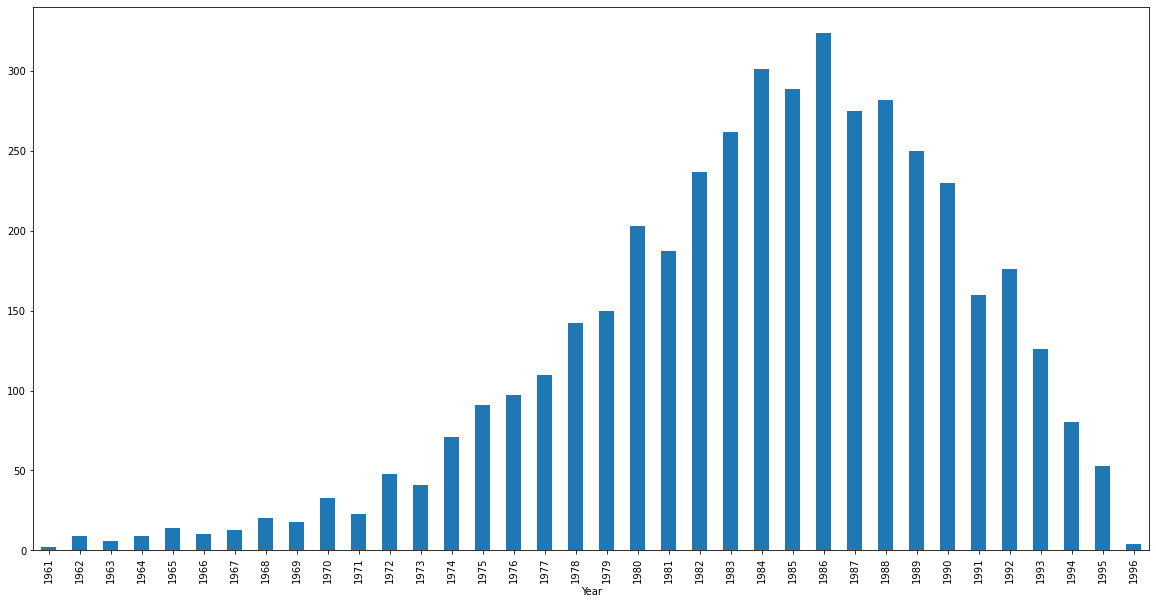

In [45]:
cust_demo.pivot_table(columns=['Year'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [46]:
cust_demo.groupby(['bank_name_clients'])['bank_name_clients'].count()

bank_name_clients
Access Bank            432
Diamond Bank           282
EcoBank                150
FCMB                   121
Fidelity Bank          103
First Bank             590
GT Bank               1598
Heritage Bank           22
Keystone Bank           19
Skye Bank              102
Stanbic IBTC           145
Standard Chartered      15
Sterling Bank           55
UBA                    353
Union Bank              23
Unity Bank               7
Wema Bank               28
Zenith Bank            301
Name: bank_name_clients, dtype: int64

<AxesSubplot:xlabel='bank_name_clients'>

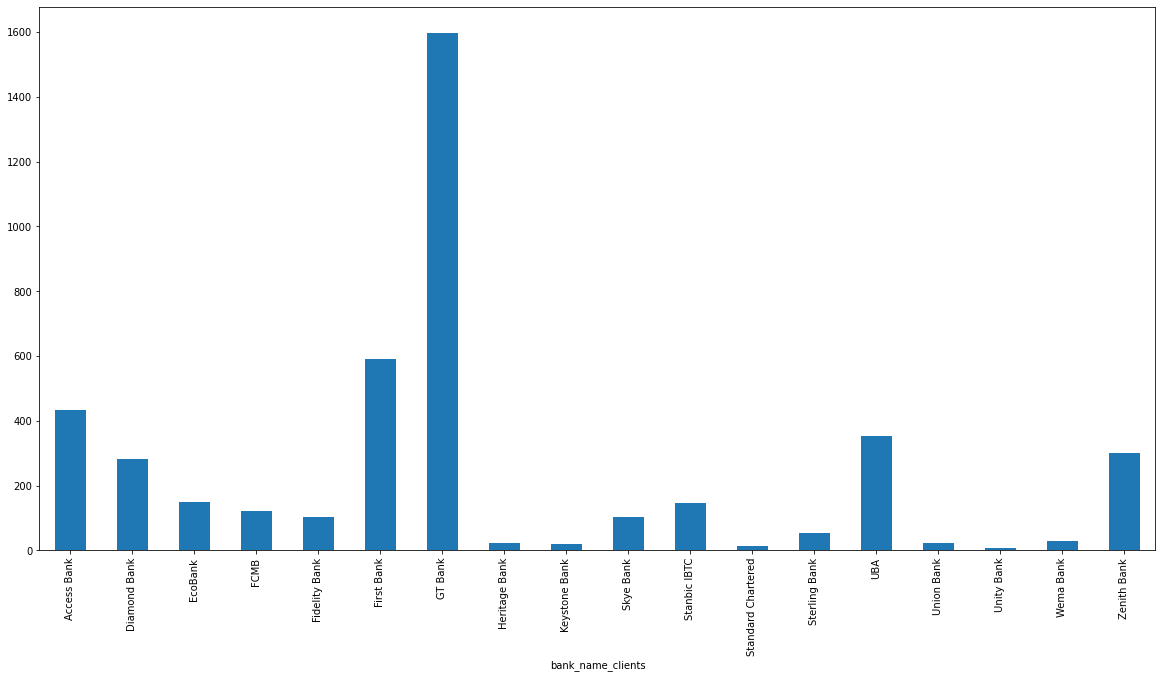

In [47]:
cust_demo.pivot_table(columns=['bank_name_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [48]:
cust_demo.groupby(['employment_status_clients'])['employment_status_clients'].count()

employment_status_clients
Contract            1
Permanent        3146
Retired             4
Self-Employed     348
Student           142
Unemployed         57
Name: employment_status_clients, dtype: int64

<AxesSubplot:xlabel='employment_status_clients'>

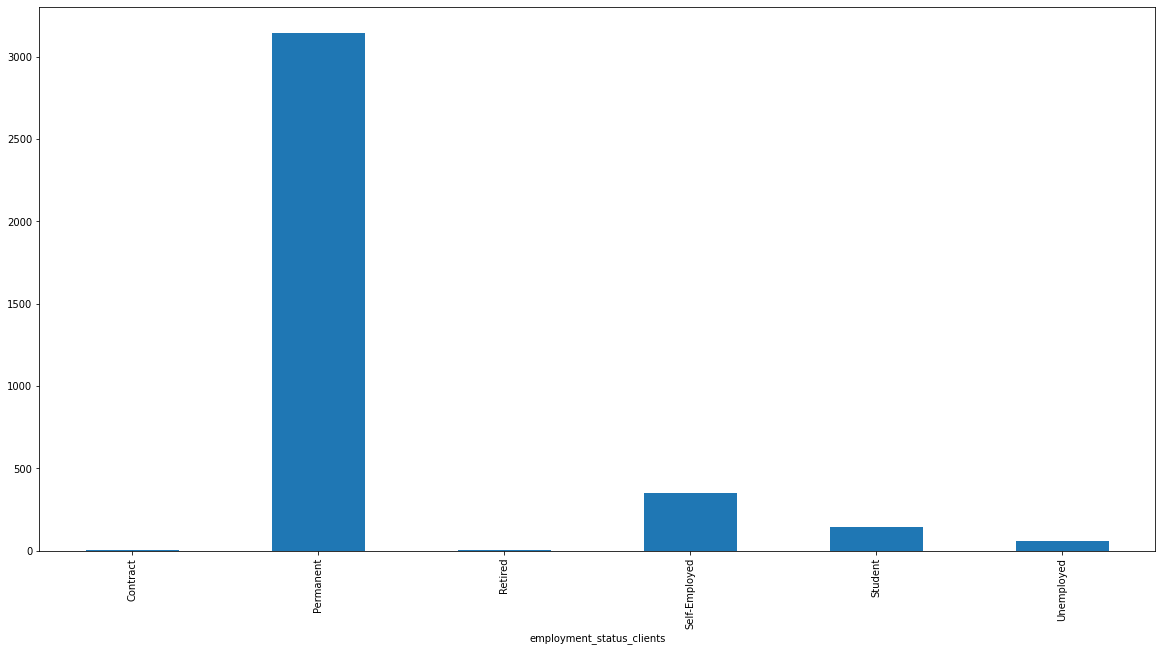

In [49]:
cust_demo.pivot_table(columns=['employment_status_clients'],aggfunc='size').plot(kind='bar', figsize = (20, 10))

In [50]:
cust_demo.groupby(['level_of_education_clients'])['level_of_education_clients'].count()

level_of_education_clients
Graduate         420
Post-Graduate     68
Primary           10
Secondary         89
Name: level_of_education_clients, dtype: int64

<AxesSubplot:ylabel='None'>

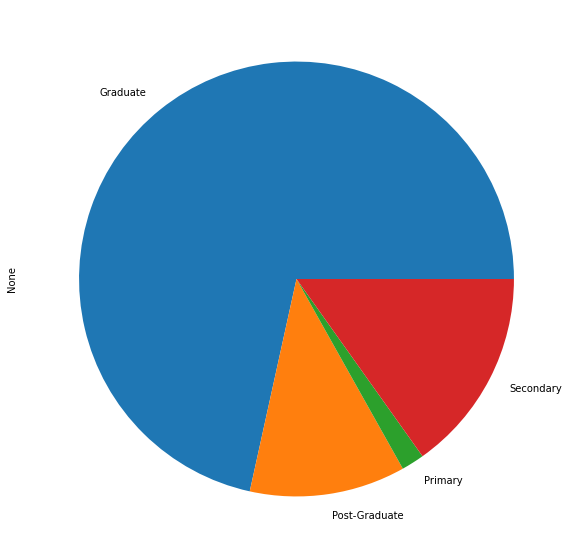

In [51]:
cust_demo.pivot_table(columns=['level_of_education_clients'],aggfunc='size').plot(kind='pie', figsize = (20, 10))

In [52]:
fig = px.scatter_geo(cust_demo, lat='latitude_gps', lon='longitude_gps', hover_name="bank_name_clients")
fig.show()

<AxesSubplot:xlabel='latitude_gps', ylabel='longitude_gps'>

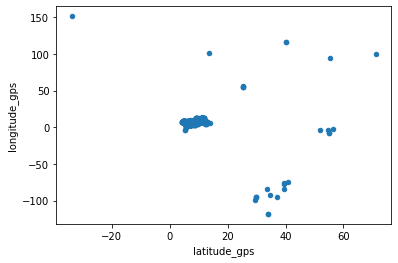

In [53]:
cust_demo.plot(x="latitude_gps", y="longitude_gps", kind="scatter")

# **PREPROCESSING THE DATA**

## **Cleaning the Data**

In [91]:
age = []
for i in cust_demo["Year"]:
  age.append(2017-int(i))


cust_demo["age"]=age

In [54]:
# Merging the Datasets

merged_data=pd.merge(cust_demo, cust_perf, on='customerid',)
merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,Year,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,301964962,2,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0,13000.0,30,8a858899538ddb8e0153a780c56e34bb,Good
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,301972172,2,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0,13000.0,30,NaN,Bad
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,301976271,4,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0,13000.0,30,NaN,Good
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,1991,301997763,2,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0,11500.0,15,NaN,Good
4,8a858ea05a859123015a8892914d15b7,1990-07-21 00:00:00.000000,Savings,3.365935,6.564823,Access Bank,NaN,Permanent,NaN,1990,301992494,6,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0,24500.0,30,NaN,Good


In [55]:
merged_data.shape

(3277, 19)

In [56]:
final_merged_data=pd.merge(merged_data, cust_prev_loans, on='customerid')
final_merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,Year,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,1973,...,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,8a858899538ddb8e0153a780c56e34bb,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,1986,...,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,NaN,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,NaN,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,NaN,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,1987,...,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,NaN,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000


In [57]:
final_merged_data.shape

(13693, 30)

In [58]:
final_merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients', 'Year',
       'systemloanid_x', 'loannumber_x', 'approveddate_x', 'creationdate_x',
       'loanamount_x', 'totaldue_x', 'termdays_x', 'referredby_x',
       'good_bad_flag', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'closeddate', 'referredby_y', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [59]:
final_merged_data.dtypes

customerid                      object
birthdate                     category
bank_account_type             category
longitude_gps                  float64
latitude_gps                   float64
bank_name_clients             category
bank_branch_clients           category
employment_status_clients     category
level_of_education_clients    category
Year                            object
systemloanid_x                   int64
loannumber_x                     int64
approveddate_x                  object
creationdate_x                  object
loanamount_x                   float64
totaldue_x                     float64
termdays_x                       int64
referredby_x                    object
good_bad_flag                   object
systemloanid_y                   int64
loannumber_y                     int64
approveddate_y                  object
creationdate_y                  object
loanamount_y                   float64
totaldue_y                     float64
termdays_y               

In [60]:
# counting missing data
final_merged_data.isna().sum()

customerid                        0
birthdate                         0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
bank_branch_clients           13589
employment_status_clients      1363
level_of_education_clients    10229
Year                              0
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
referredby_x                  12891
good_bad_flag                     0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                        0
referredby_y                

In [61]:
final_merged_data.drop(['bank_branch_clients','referredby_x','referredby_y'], axis=1, inplace=True)

In [62]:
final_merged_data.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'Year', 'systemloanid_x', 'loannumber_x',
       'approveddate_x', 'creationdate_x', 'loanamount_x', 'totaldue_x',
       'termdays_x', 'good_bad_flag', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [63]:
final_merged_data['employment_status_clients'].fillna(final_merged_data['employment_status_clients'].mode()[0], inplace=True)
final_merged_data['level_of_education_clients'].fillna('Graduate', inplace=True)
final_merged_data.isna().sum() 

customerid                    0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
Year                          0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
good_bad_flag                 0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
dtype: int64

In [64]:
final_merged_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,systemloanid_x,...,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,Permanent,Graduate,1973,301964962,...,301943951,1,2017-06-19 17:55:26.000000,2017-06-19 16:54:19.000000,10000.0,11500.0,15,2017-07-04 18:09:47.000000,2017-07-05 00:00:00.000000,2017-07-04 17:59:36.000000
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,Graduate,1986,301972172,...,301929966,1,2017-06-07 12:47:30.000000,2017-06-07 11:46:22.000000,10000.0,13000.0,30,2017-07-10 08:52:54.000000,2017-07-07 00:00:00.000000,2017-07-10 08:42:44.000000
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate,1987,301976271,...,301931228,3,2017-06-08 11:49:34.000000,2017-06-08 10:49:27.000000,10000.0,13000.0,30,2017-07-11 10:12:20.000000,2017-07-10 00:00:00.000000,2017-07-11 10:02:11.000000
3,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate,1987,301976271,...,301895253,1,2017-05-08 11:07:01.000000,2017-05-08 10:06:40.000000,10000.0,11500.0,15,2017-05-27 13:02:53.000000,2017-05-23 00:00:00.000000,2017-05-27 12:52:45.000000
4,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,Permanent,Graduate,1987,301976271,...,301919784,2,2017-05-27 17:10:41.000000,2017-05-27 16:10:34.000000,10000.0,11500.0,15,2017-06-08 11:13:50.000000,2017-06-12 00:00:00.000000,2017-06-08 11:03:40.000000


In [65]:
final_merged_data.tail()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Year,systemloanid_x,...,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate
13688,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,301990956,...,301633289,1,2016-06-16 08:36:03.000000,2016-06-16 07:35:56.000000,10000.0,11500.0,15,2016-07-05 23:59:54.000000,2016-07-01 00:00:00.000000,2016-07-05 23:44:51.000000
13689,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,301990956,...,301918076,5,2017-05-25 13:39:27.000000,2017-05-25 12:39:21.000000,10000.0,13000.0,30,2017-06-19 17:03:34.000000,2017-06-26 00:00:00.000000,2017-06-19 16:53:24.000000
13690,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,301990956,...,301824314,3,2017-02-22 17:16:36.000000,2017-02-22 16:16:28.000000,10000.0,13000.0,30,2017-03-23 19:19:20.000000,2017-03-24 00:00:00.000000,2017-03-23 19:04:10.000000
13691,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate,1985,301990956,...,301874438,4,2017-04-20 12:21:24.000000,2017-04-20 11:21:09.000000,10000.0,13000.0,30,2017-05-21 10:07:50.000000,2017-05-22 00:00:00.000000,2017-05-21 09:52:41.000000
13692,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,Permanent,Graduate,1982,301989135,...,301960158,1,2017-07-02 17:50:14.000000,2017-07-02 16:49:05.000000,10000.0,11500.0,15,2017-07-16 06:31:38.000000,2017-07-18 00:00:00.000000,2017-07-16 06:21:28.000000


In [66]:
final_merged_data.dtypes

customerid                      object
birthdate                     category
bank_account_type             category
longitude_gps                  float64
latitude_gps                   float64
bank_name_clients             category
employment_status_clients     category
level_of_education_clients    category
Year                            object
systemloanid_x                   int64
loannumber_x                     int64
approveddate_x                  object
creationdate_x                  object
loanamount_x                   float64
totaldue_x                     float64
termdays_x                       int64
good_bad_flag                   object
systemloanid_y                   int64
loannumber_y                     int64
approveddate_y                  object
creationdate_y                  object
loanamount_y                   float64
totaldue_y                     float64
termdays_y                       int64
closeddate                      object
firstduedate             

In [67]:
# converting data types

In [68]:
final_merged_data.dtypes

customerid                      object
birthdate                     category
bank_account_type             category
longitude_gps                  float64
latitude_gps                   float64
bank_name_clients             category
employment_status_clients     category
level_of_education_clients    category
Year                            object
systemloanid_x                   int64
loannumber_x                     int64
approveddate_x                  object
creationdate_x                  object
loanamount_x                   float64
totaldue_x                     float64
termdays_x                       int64
good_bad_flag                   object
systemloanid_y                   int64
loannumber_y                     int64
approveddate_y                  object
creationdate_y                  object
loanamount_y                   float64
totaldue_y                     float64
termdays_y                       int64
closeddate                      object
firstduedate             

In [69]:
train_df=final_merged_data.drop(columns=['customerid','birthdate','systemloanid_x','systemloanid_y','approveddate_x','approveddate_y','creationdate_x','creationdate_y','closeddate','firstduedate','firstrepaiddate'])

## Deductions

- Variables that might not be useful for the model were dropped.

In [ ]:
categorical_cols=['bank_account_type', 'bank_name_clients','employment_status_clients','level_of_education_clients','Year','good_bad_flag']
numerical_cols=['longitude_gps','latitude_gps','loanamount_x','loanamount_y','termdays_y','loanamount_y','totaldue_y','termdays_x','loanamount_x','totaldue_x','loannumber_x','loannumber_y']

In [70]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,longitude_gps,latitude_gps,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,...,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,good_bad_flag_Good
0,3.319219,6.528604,2,10000.0,13000.0,30,1,10000.0,11500.0,15,...,0,0,0,0,0,0,0,0,0,1
1,3.325598,7.119403,2,10000.0,13000.0,30,1,10000.0,13000.0,30,...,0,0,0,0,0,0,0,0,0,0
2,5.746100,5.563174,4,10000.0,13000.0,30,3,10000.0,13000.0,30,...,0,0,0,0,0,0,0,0,0,1
3,5.746100,5.563174,4,10000.0,13000.0,30,1,10000.0,11500.0,15,...,0,0,0,0,0,0,0,0,0,1
4,5.746100,5.563174,4,10000.0,13000.0,30,2,10000.0,11500.0,15,...,0,0,0,0,0,0,0,0,0,1


In [71]:
print(train_df_encoded.columns)

Index(['longitude_gps', 'latitude_gps', 'loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'loannumber_y', 'loanamount_y',
       'totaldue_y', 'termdays_y', 'bank_account_type_Other',
       'bank_account_type_Savings', 'bank_name_clients_Diamond Bank',
       'bank_name_clients_EcoBank', 'bank_name_clients_FCMB',
       'bank_name_clients_Fidelity Bank', 'bank_name_clients_First Bank',
       'bank_name_clients_GT Bank', 'bank_name_clients_Heritage Bank',
       'bank_name_clients_Keystone Bank', 'bank_name_clients_Skye Bank',
       'bank_name_clients_Stanbic IBTC',
       'bank_name_clients_Standard Chartered',
       'bank_name_clients_Sterling Bank', 'bank_name_clients_UBA',
       'bank_name_clients_Union Bank', 'bank_name_clients_Unity Bank',
       'bank_name_clients_Wema Bank', 'bank_name_clients_Zenith Bank',
       'employment_status_clients_Permanent',
       'employment_status_clients_Retired',
       'employment_status_clients_Self-Employed',
       'empl

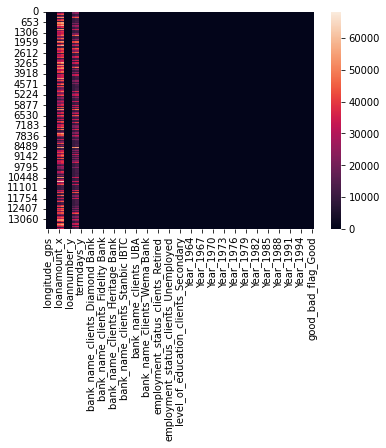

In [72]:
hm = sns.heatmap(data=train_df_encoded)
plt.show()

# Machine Learning 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB

In [74]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='good_bad_flag_Good')
y = train_df_encoded['good_bad_flag_Good']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify =y,random_state =42)

# Logistic Regression

In [75]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(logisticRegr,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8153364632237872
Training Data F1 Score  0.8982758620689655
Validation Mean F1 Score:  0.44907457714501
Validation Mean Accuracy:  0.8151278038601983


In [76]:
print("Test Accuracy: ",accuracy_score(y_train,y_pred))
print("Test F1 Score: ",f1_score(y_train,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8153364632237872
Test F1 Score:  0.8982758620689655
Confusion Matrix on Test Data


Predicted,1,All
True,,
0,1770,1770
1,7815,7815
All,9585,9585


# Decision Tree

In [77]:

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [78]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.9063954036733028
Validation Mean Accuracy:  0.9458528951486699


In [79]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Test Accuracy: ",accuracy_score(y_train,y_pred))
print("Test F1 Score: ",f1_score(y_train,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8162754303599374
Test F1 Score:  0.8985891160380076
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,1748,1770
1,13,7802,7815
All,35,9550,9585


# Random Forests

In [80]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = tree_clf.predict(X_train)

In [81]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8162754303599374
Training Data F1 Score  0.8985891160380076
Validation Mean F1 Score:  0.4522877510583836
Validation Mean Accuracy:  0.8149191444966093


In [82]:
print("Test Accuracy: ",accuracy_score(y_train,y_pred))
print("Test F1 Score: ",f1_score(y_train,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8162754303599374
Test F1 Score:  0.8985891160380076
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,1748,1770
1,13,7802,7815
All,35,9550,9585


# Artificial Neural Networks

In [83]:
ANN_clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)
ANN_clf.fit(X_train, y_train)
y_pred = ANN_clf.predict(X_train)

In [84]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.8130412102243089
Training Data F1 Score  0.8967266021207931
Validation Mean F1 Score:  0.4522877510583836
Validation Mean Accuracy:  0.8149191444966093


In [85]:
print("Test Accuracy: ",accuracy_score(y_train,y_pred))
print("Test F1 Score: ",f1_score(y_train,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8130412102243089
Test F1 Score:  0.8967266021207931
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,13,1757,1770
1,35,7780,7815
All,48,9537,9585


# Naive Bayes

In [86]:
# Instantiating  and fitting the Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_train)

In [87]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  0.6743870631194575
Training Data F1 Score  0.7845059725195057
Validation Mean F1 Score:  0.4522877510583836
Validation Mean Accuracy:  0.8149191444966093


In [88]:
print("Test Accuracy: ",accuracy_score(y_train,y_pred))
print("Test F1 Score: ",f1_score(y_train,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.6743870631194575
Test F1 Score:  0.7845059725195057
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,783,987,1770
1,2134,5681,7815
All,2917,6668,9585
